# 数据预处理

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')  
plt.rcParams['font.sans-serif'] = ['SimHei']  

columns = ['user_id','order_dt','order_products','order_amounts']
df = pd.read_csv('CDNOW_master.txt',names = columns, sep = r'\s+')
df.head()

,user_id,order_dt,order_products,order_amounts
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
# 数据处理
df['order_date'] = pd.to_datetime(df['order_dt'],format = '%Y%m%d')   #
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')  #
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp() #
df.head()

,user_id,order_dt,order_products,order_amounts,order_date,order_month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


# 一、用户整体消费趋势分析（按月份）
按月份统计产品购买数量，消费金额，消费次数，消费人数

Text(0, 0.5, '消费人数')

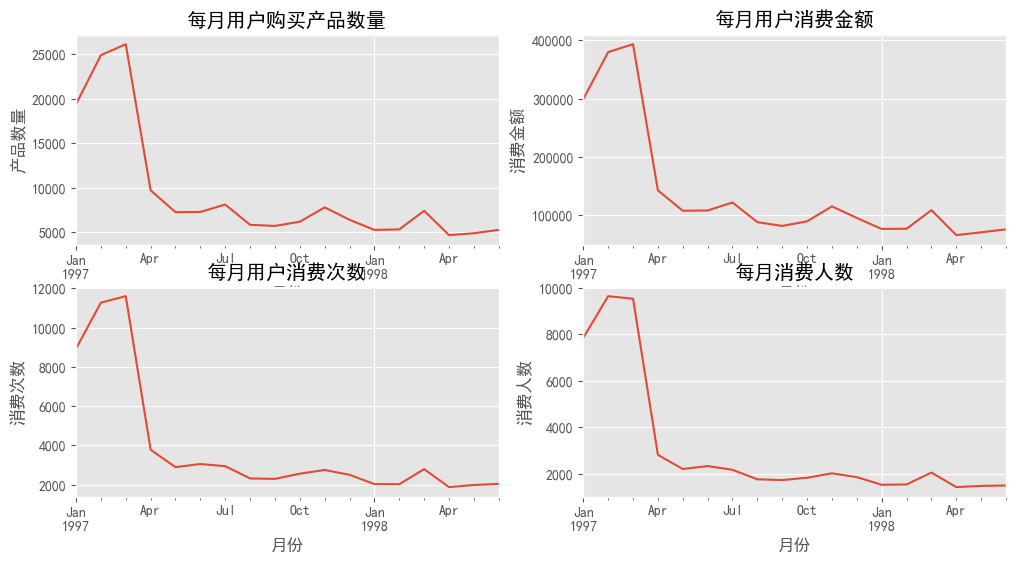

In [4]:
# 每月用户购买产品数量可视化
plt.figure(figsize = (12,6))
plt.subplot(221)
df.groupby('order_month')['order_products'].sum().plot()
plt.title('每月用户购买产品数量')
plt.xlabel('月份')
plt.ylabel('产品数量')

# 每月用户消费金额可视化
plt.subplot(222)
df.groupby('order_month')['order_amounts'].sum().plot()
plt.title('每月用户消费金额')
plt.xlabel('月份')
plt.ylabel('消费金额')

# 每月用户消费次数可视化
plt.subplot(223)
df.groupby('order_month')['user_id'].count().plot()
plt.title('每月用户消费次数')
plt.xlabel('月份')
plt.ylabel('消费次数')

# 每月消费人数可视化
plt.subplot(224)
df.groupby('order_month')['user_id'].nunique().plot()
plt.title('每月消费人数')
plt.xlabel('月份')
plt.ylabel('消费人数')

# 二、用户个体消费分析（金额，次数，占比）
### 1.用户消费金额，产品数量描述统计

In [10]:
df

,user_id,order_dt,order_products,order_amounts,order_date,order_month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01
...,...,...,...,...,...,...
69654,23568,19970405,4,83.74,1997-04-05,1997-04-01
69655,23568,19970422,1,14.99,1997-04-22,1997-04-01
69656,23569,19970325,2,25.74,1997-03-25,1997-03-01
69657,23570,19970325,3,51.12,1997-03-25,1997-03-01


ValueError: pie requires either y column or 'subplots=True'

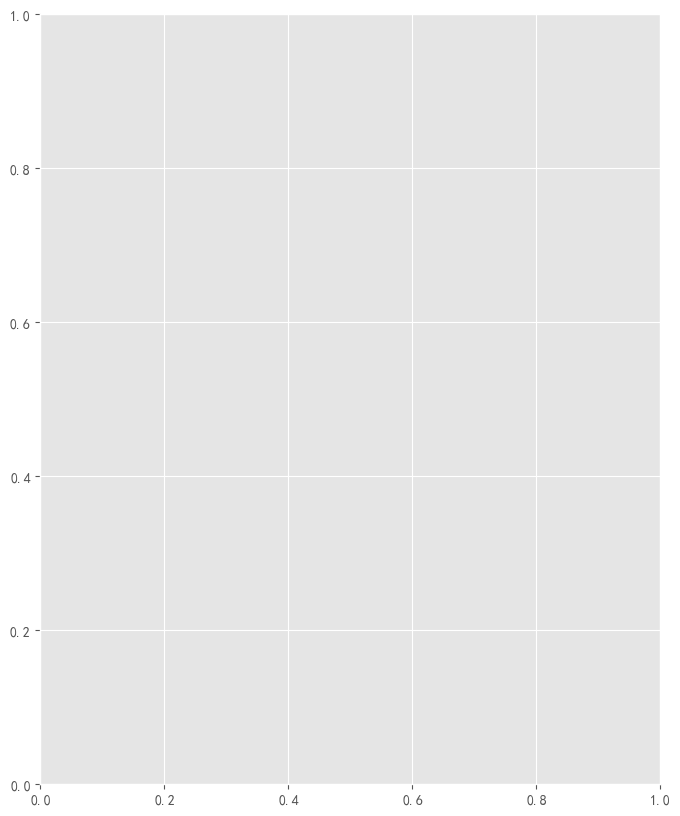

In [50]:
# 每个用户总消费金额直观图--看用户消费情况
less_month = df[['user_id','order_amounts']]
cost_amounts = less_month.groupby('user_id').sum().reset_index()


# 绘图
#plt.figure(figsize = (12,4))
#plt.ylim(0,6000)
#plt.ylabel('该用户消费的金额') 
#plt.xlabel('用户id')
#plt.bar(cost_amounts['user_id'], cost_amounts['order_amounts']) 

Text(0.5, 0, '该产品用户购买的数量')

<Figure size 1000x750 with 0 Axes>

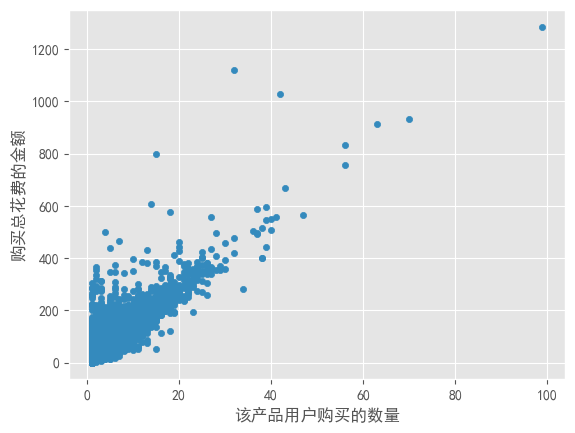

In [46]:
# 用户购买产品数量和购买产品所花费的钱的对比--看商品平均单价
plt.figure(figsize = (10,7.5))
df.plot(kind ='scatter',x ='order_products',y ='order_amounts')   # scatter点图
plt.ylabel('购买总花费的金额') 
plt.xlabel('该产品用户购买的数量')

# 斜率为10，商品平均单价为10

### 2.用户消费分布图
每笔订单消费金额

每个用户产品购买数量

Text(0.5, 1.0, '每个用户购买数量的多少')

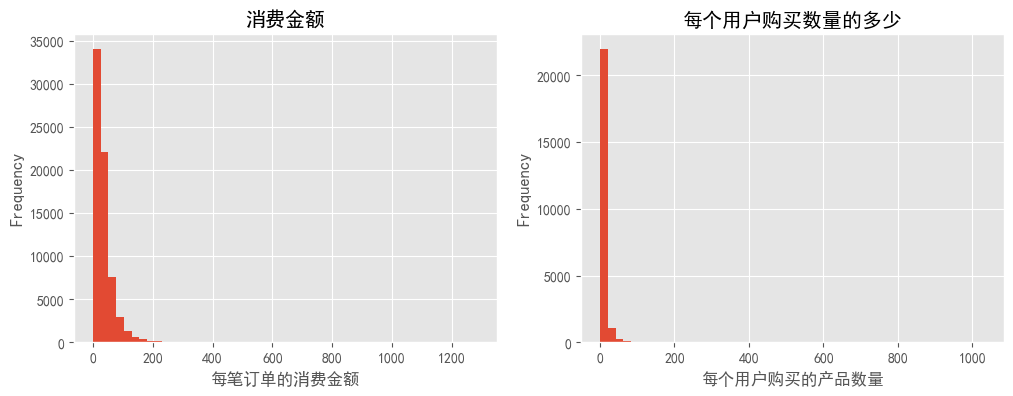

In [49]:
# 每比订单消费金额---有接近35000单都是50块以下的单价
plt.figure(figsize =  (12,4))
plt.subplot(121)
df['order_amounts'].plot(kind='hist',bins=50)  
plt.title('消费金额')
plt.xlabel('每笔订单的消费金额') 

# 每个用户产品购买数量---每个用户购买量很少，集中在50以内
plt.subplot(122)
df.groupby('user_id')['order_products'].sum().plot.hist(bins=50)
plt.xlabel('每个用户购买的产品数量')
plt.title('每个用户购买数量的多少')

### 3.用户累计消费金额占比分析（用户的贡献度）

Text(0.5, 1.0, '贡献率')

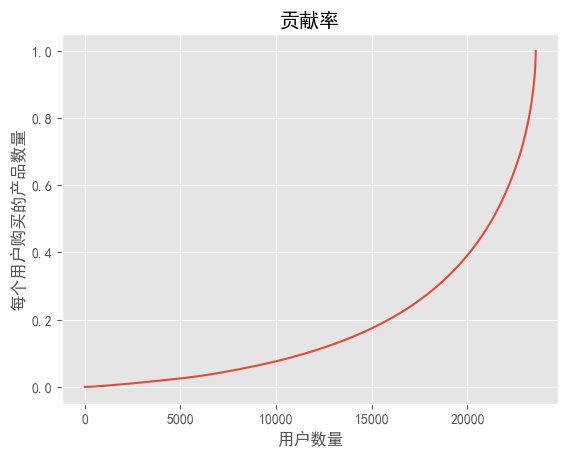

In [81]:
user_cumsum = df.groupby('user_id')['order_amounts'].sum().sort_values().reset_index()
user_cumsum['amount_cumsum'] = np.cumsum(user_cumsum['order_amounts'])
total_amount = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum['amount_cumsum'].apply(lambda x:x/total_amount)
user_cumsum['prop'].plot()
plt.xlabel('用户数量')
plt.ylabel('每个用户购买的产品数量')
plt.title('贡献率')
# 前20000用户只贡献了总金额的40%，剩下的3500名贡献了60% （2/8原则）

# 三、用户消费行为
### 1.首购时间

Text(0, 0.5, '数量')

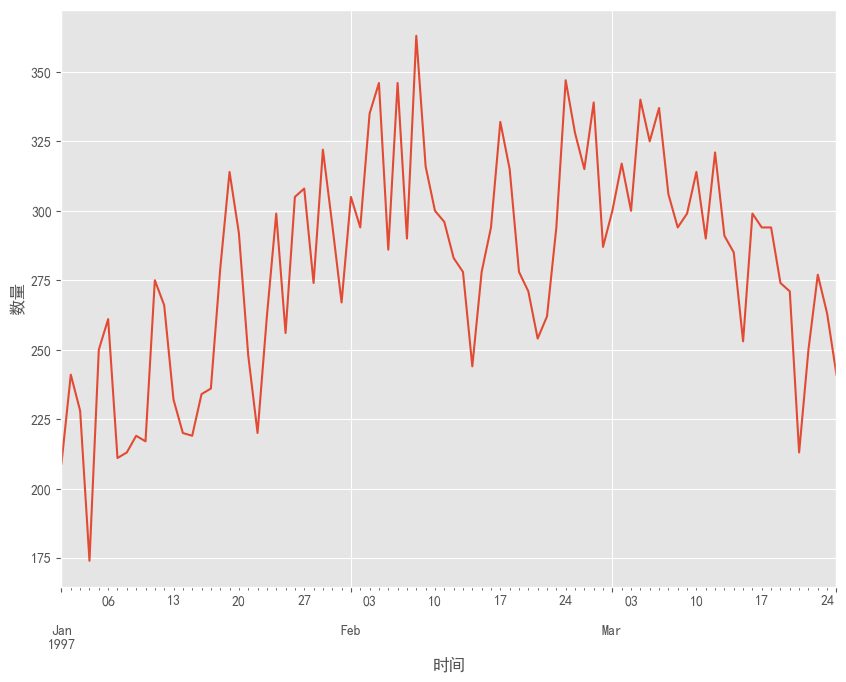

In [85]:
# 计算首购时间
df['first_time_purchase'] = df.groupby('user_id')['order_date'].transform('min')

# 绘表
plt.figure(figsize=(10, 7.5)) 
df.groupby('first_time_purchase')['user_id'].nunique().plot()
plt.xlabel('时间')
plt.ylabel('数量')

### 2.最后一次购买时间

Text(0, 0.5, '数量')

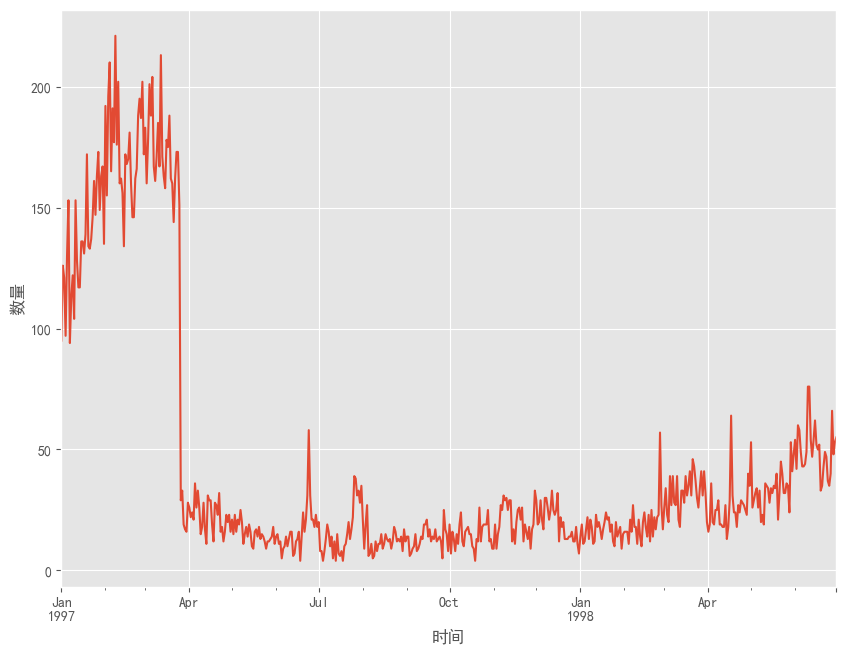

In [86]:
# 计算最后一次时间
df['last_time_purchase'] = df.groupby('user_id')['order_date'].transform('max')

# 绘表
plt.figure(figsize=(10, 7.5)) 
df.groupby('last_time_purchase')['user_id'].nunique().plot()
plt.xlabel('时间')
plt.ylabel('数量')

# 四、用户分层
### 3.1 构建RFM 模型
为了进行精细化运营，可以利用RFM模型对用户价值指数(衡量历史到当前用户贡献的收益)进行计算，其中

R:(Recency，最近一次消费)，R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近

F:(Frequency，消费频率)，F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃(此处我们选择购买产品数量作F)

M:(Monetary，消费金额)，M值越大，表示客户价值越高，反之则表示客户价值越低

根据上述三个维度，对客户做细分

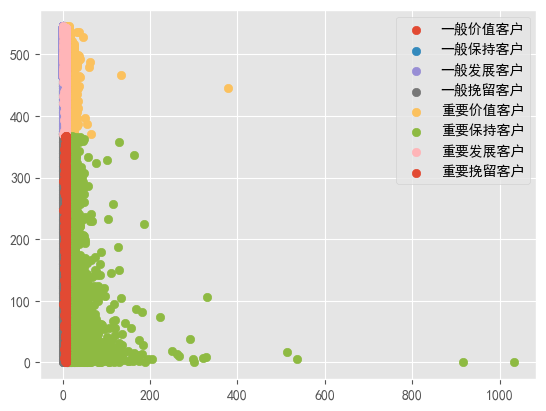

In [92]:
# 创建透视表
rfm = df.pivot_table(
    index = 'user_id',
    values = ['order_products','order_amounts','order_date'],
    aggfunc = {
        'order_amounts':'sum',  
        'order_date':'max', 
        'order_products':'sum'  
    }              
              )

# 计算出M/F/R的数据
rfm['R'] = (df['order_date'].max() - rfm['order_date'])/np.timedelta64(1,'D')
rfm.rename(columns = {'order_amounts':'M','order_products':'F'},inplace=True)

# 得出用户的标签
def rfm_func(x):
    r_label = '1' if x['R'] >=1 else '0'
    f_label = '1' if x['F'] >=1 else '0'
    m_label = '1' if x['M'] >=1 else '0'
    
    label = r_label + f_label + m_label
    dic = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    return dic[label]
rfm['label'] = rfm[['M','F','R']].apply(lambda x:x-x.mean()).apply( rfm_func , axis = 1)

# 绘图---客户分层可视化
for label,grouped in rfm.groupby('label'):
    x = grouped['F']  
    y = grouped['R']  
    plt.scatter(x,y,label = label)
plt.legend()

### 2.新老用户，活跃用户，回流用户分析
·新用户的定义是第一次消费。

·活跃用户即老客，在某一个时间窗口内有过消费。

·不活跃用户则是时间窗口内没有消费过的老客。

·回流用户:相当于回头客的意思。

用户回流的动作可以分为自主回流与人工回流，自主回流指玩家自己回流了，而人工回流则是人为参与导致的。

<Axes: xlabel='order_month'>

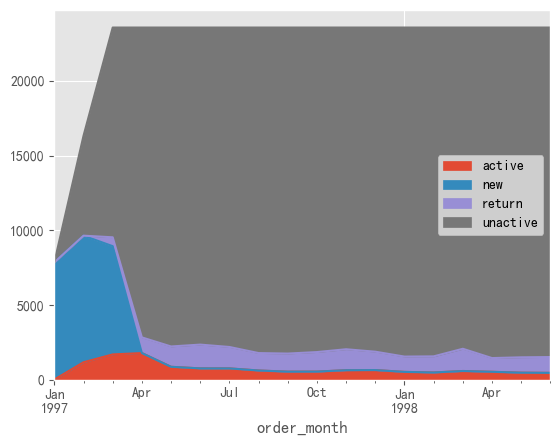

In [107]:
# 创建透视表
user_cool = df.pivot_table(
    index = 'user_id',
    columns = 'order_month',
    values = 'order_products',
    aggfunc = 'count'
              ).fillna(0)

df_purchase = (user_cool > 0).astype(int)

# 判断用户类型
def active_status(data):
    status = []
    for i in range(18):
        if data.iloc[i] == 1:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unreg':
                    status.append('new')
                elif status[i-1] == 'unactive':
                    status.append('return')
                else:
                    status.append('active')
        else:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
    return pd.Series(status,df_purchase.columns)   
purchase_states = df_purchase.apply(active_status,axis = 1)

# 处理数据，计算各种用户类型的数量，排除unreg数据
new_states = purchase_states.replace('unreg',np.nan).apply(lambda x:x.value_counts())

# 绘制用户面积图  
new_states.T.fillna(0).plot.area()

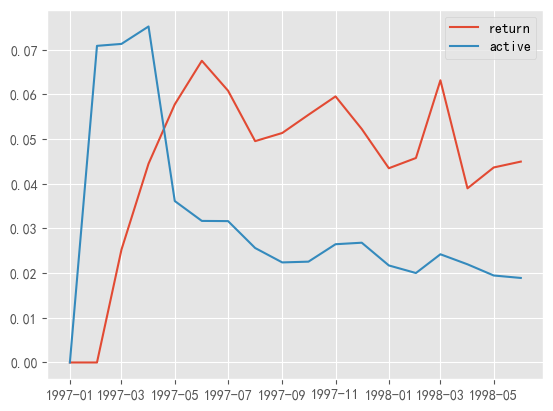

In [113]:
# 用户占比 
rate = new_states.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
plt.plot(rate['return'],label='return')  # 回流用户占比
plt.plot(rate['active'],label='active')  # 活跃用户占比
plt.legend()

### 五、用户购买周期
这一次购买-上一次购买=天数（购买周期），计算平均购买周期---用户活跃度

C:\Users\umipro3\AppData\Local\Temp\ipykernel_6020\3519692696.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  order_diff = df.groupby('user_id').apply(lambda x:x['order_date']-x['order_date'].shift())


<Axes: >

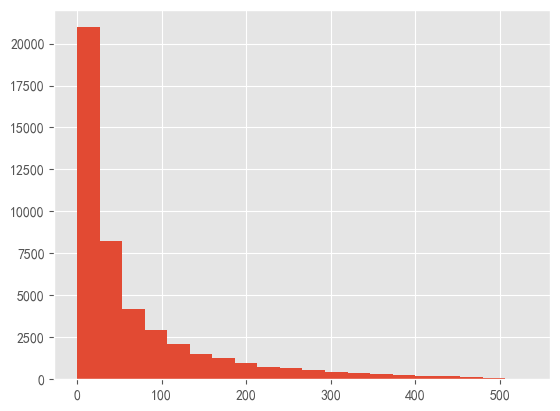

In [109]:
# 计算购买周期:以user_id分组，每一个id为一组。将每一组共同下移一位，用没移动的数据减去移动的数据，就是这个id每一次的购买周期
order_diff = df.groupby('user_id').apply(lambda x:x['order_date']-x['order_date'].shift())

# 绘图
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

### 六、用户生命周期
用户生命周期 = 用户第一次购买到最后一次购买的时间

计算方式：用户最后一次购买日期-第一次购买日期。如果差值=0，说明用户只购买了一次。

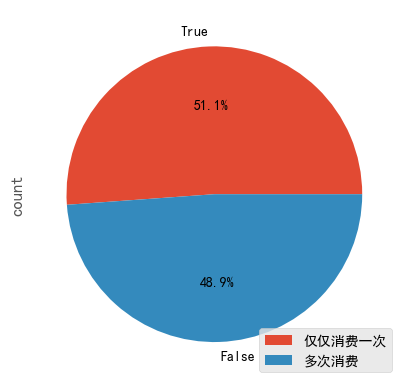

In [116]:
# 仅消费一次与多次消费饼图
user_life = df.groupby('user_id')['order_date'].agg(['min','max']) 
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['仅仅消费一次','多次消费'])

In [125]:
# 生命周期分析
(user_life['max']-user_life['min']).describe()

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

0          0.0
1          0.0
2        511.0
3        345.0
4        367.0
         ...  
23565      0.0
23566      0.0
23567     28.0
23568      0.0
23569      1.0
Name: 0, Length: 23570, dtype: float64

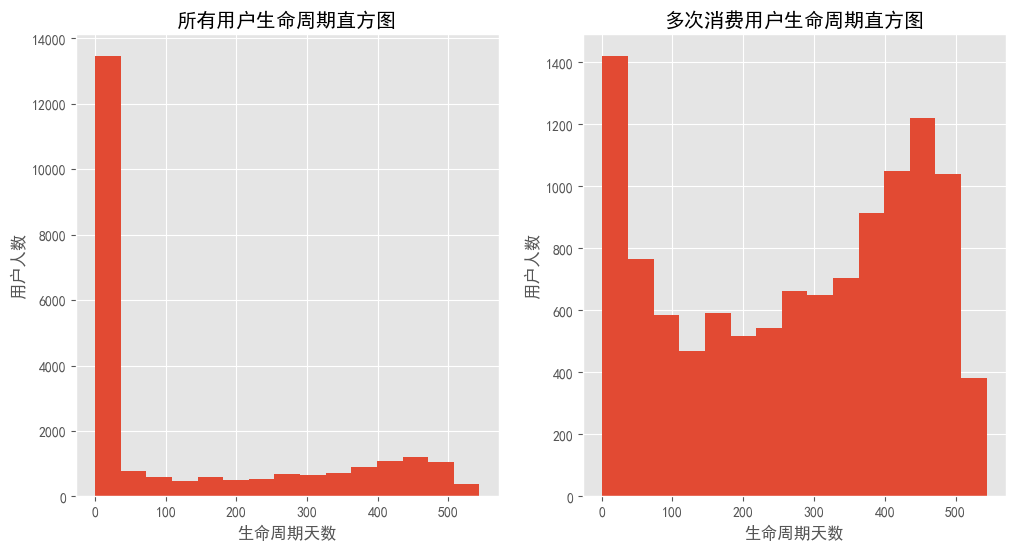

In [127]:
# 绘制所有用户生命周期直方图
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

# 多次消费用户生命周期直方图
plt.subplot(122)
u_1 = (user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)  # u_1=0时是仅消费一次的数据，u_1>0多次消费
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

# 七、复购率和回购率分析
### 1.复购率分析（本月买了多次叫复购）
计算方式：在自然月内，购买多次的用户在总消费人数中的占比---本月复购用户总数/本月购物用户总数(若客户在同一天消费了多次，也称为复购用户)

消费者有三种：复购用户--消费记录>=2的，以1表示；  非复购用户--只消费了1次的人数，以0表示；  不消费用户--本月无消费者，以NaN表示（只有购物了的才能进入复购率计算）

<Axes: xlabel='order_month'>

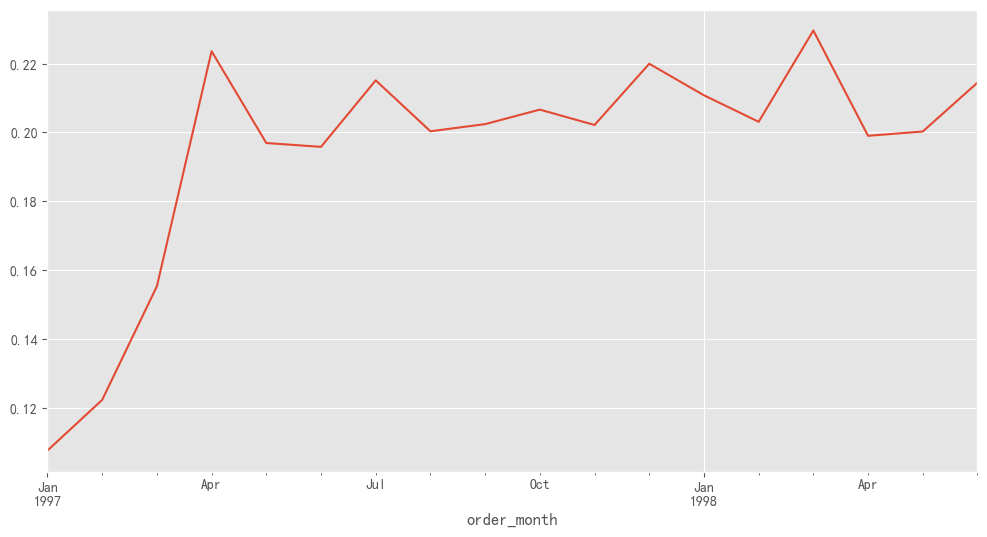

In [129]:
# purchase_r = user_data.applymap(lambda x:1 if x >1 else np.nan if x==0 else 0 )
# purchase_r.sum()   复购人数的总量
# purchase_r.count() 购物人数的总量（包括复购用户和非复购用户，不包括NaN即没进行消费的用户）

# applymap被标记为弃用，采用numpy的向量化操作 
# 使用 numpy.where 来创建条件逻辑  
purchase_r = pd.DataFrame(np.where(user_cool > 1, 1, np.where(user_cool == 0, np.nan, 0)), index=user_cool.index, columns=user_cool.columns)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))

### 2.回购率分析（下个月又买叫回购）
计算方式：在一个时间窗口内进行了消费，在下一个窗口内又进行了消费---本月回购用户/回购用户+非回购用户

回购用户：这个月消费了，下个月还消费了，1

非回购用户：这个月消费了，下个月没消费，0

NaN：这个月没消费，NaN

Text(0.5, 1.0, '用户回购率和复购率对比图')

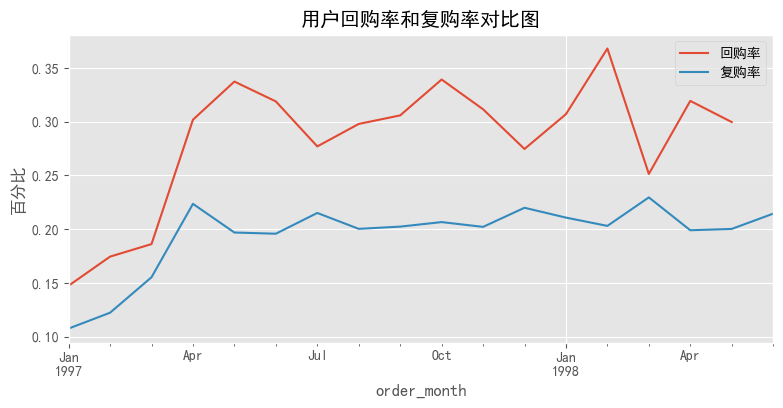

In [133]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data.iloc[i] == 1:
            if data.iloc[i+1] == 1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status,df_purchase.columns)

purchase_buy = df_purchase.apply(purchase_back,axis=1)

# 回购率绘图
plt.figure(figsize=(20,4))
plt.subplot(121)

# 回购率计算
(purchase_buy.sum()/purchase_buy.count()).plot(label='回购率')
# 复购率
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比')
plt.title('用户回购率和复购率对比图')

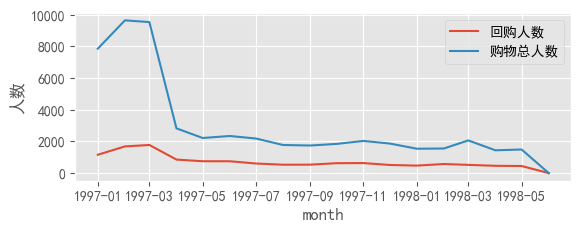

In [134]:
# 回购人数与购物总人数
plt.subplot(212)
plt.plot(purchase_buy.sum(),label='回购人数')
plt.plot(purchase_buy.count(),label='购物总人数')
plt.xlabel('month')
plt.ylabel('人数')
plt.legend()

### 项目总结
1.整体趋势：按年的月份趋势销量和销售在1-3月份相对极高，然后骤降，原因可能跟这段时间的大力促销或与商品的季度属性有关。

2.用户个体特征:每笔订单的金额和商品购买量都集中在区间的低段水平，都是小金额小批量进行购买，此类交易群体，可在丰富产品线和增加促销活动提高转换率和购买率。

3.大部分用户的消费总额和购买总量都集中刚在低段，长尾分布，这个跟用户需求有关，可以对商品进行多元文化价值的赋予，增强其社交价值属性，提高用户的价值需求。

4.用户的消费周期:有二次以上消费的用户，平均68天，所以在50天到60天期间，应该对这批用户进行刺激召回，细致点，比如10天回复满意度，30天发放优惠券，55天的时候提醒优惠券的使用。

5.用户的生命周期:有二次及以上消费的用户的平均生命周期是276天。用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期;在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

6.新客户的复购率约为12%，老客户的复购率在20%左右;新客户的回购率在15%左右，老客户的回购率在30%左右，需要营销策略积极引导其再次消费及持续消费。

7.用户质量:用户个体消费有一定规律性，大部分用户的消费集中在2000以下，用户消费反应了2/8法则，消费排名前20%的用户贡献了80%的消费额。所以说，狠抓高质量用户是万古不变的道理，这些高质量客户都是“会员”类型，需要专门为会员优化购物体验，比如专线接听特殊优惠等等。
### 方法总结
1.针对用户进行按照月份做整体和个体分析，主要分析维度是人数，消费金额，购买量

2.消费分析:首购时间，最后一次购买时间，相邻两个购物时间的间隔，用户分层(RFM模型+数据透视表),分析维度主要是新用户，活跃用户，不活跃用户流失分析，回流用户占比

3.复购率和回购率进行分析